In [2]:
# zunächst importieren wir das MNE Package, damit wir es verwenden können
import logging
logging.getLogger('numexpr').setLevel(logging.WARNING)
import mne 
from mne import viz
from mne.io import RawArray
import matplotlib.pyplot as plt
import numpy as np
from meegkit.detrend import detrend
from meegkit.dss import dss_line
import pandas as pd
from helper_functions import *
mne.set_log_level('ERROR')

# Übersicht:
1) EEG Daten laden

2) Signal Betrachtung

3) Frequenz Power Spektrum & Frequenz-Bänder

## 1) Daten laden

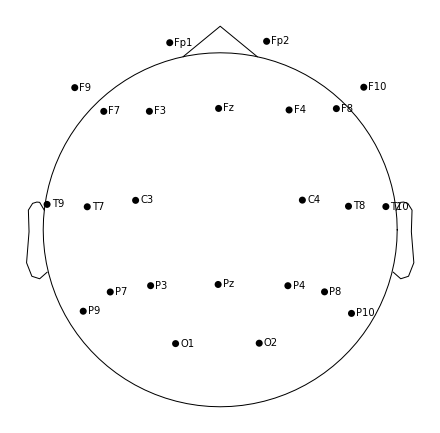

In [26]:
# Name der Datei
fdir = 'Experiment/output_data/'
fname = 'Jiachen_Test_2024-02-21_11-16-58.vhdr'

# Lade die Datei. In MNE werden EEG Datensätze im "Raw" format gespeichert.
raw = mne.io.read_raw_brainvision(fdir+fname, preload=True)

# Standard Map laden und an Datensatz zufügen
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
fig = raw.plot_sensors(show_names=True)

## 2) Signal Betrachtung

Abgebildete Elektroden: ['P4', 'P8', 'P10']


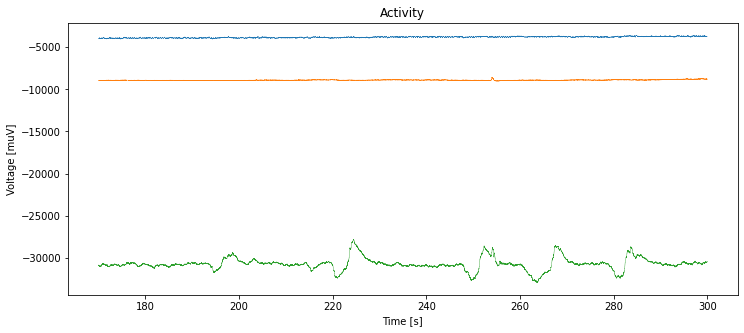

In [24]:
# Beispiel: Elektroden mit schlechtem Signal
plot_signal(raw, start=170, end=300, electrodes=[19, 20, 21]) # Elektrode P10 hat ein schlechtes Signal  

### 3) Frequenz Power Spektrum
Gehirnsignale bestehen aus **Wellen**, die sich oft in vielen verschiedenen **Frequenzen** bewegen. Genauso ist es beispielsweise auch bei Tonsignalen, sowie bei einem Akkord, den ihr auf dem Klavier spielt. Stellt euch vor ihr spielt einen Akkord von drei Tönen, wobei jeder Ton eine Klangwelle darstellt die in einer spezifischen Frequenz oszilliert. Ton 1 hat eine Freuqenz von **1Hz**, Ton 2 hat eine Frequenz von **5Hz**, und Ton 3 hat eine Frequenz von **10Hz**. Ton 2 hat außerdem eine höhere Amplitude als die anderen beiden Tön (und somit eine höhere Lautstärke). Wenn wir alle drei Klangwellen zusammenaddieren erhalten wir ein Signal das den ganzen Akkord beschreibt (siehe die zweite Abbildung). 

In [6]:
# Frequenzen der Wellen/Töne
f1 = 1
f2 = 5
f3 = 10
dur = 1
fs = 1000 # sampling frequency
t = np.arange(dur * fs) / fs
y1 = np.sin(2 * np.pi * f1 * t)
y2 = 1.5 * np.sin(2 * np.pi * f2 * t)
y3 = np.sin(2 * np.pi * f3 * t)
combined = y1+y2+y3

# Frequency domain representation
fourierTransform = np.fft.fft(combined)/len(combined)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(combined)/2))] # Exclude sampling frequency

tpCount = len(combined)
frequncies = np.arange(int(tpCount/2))

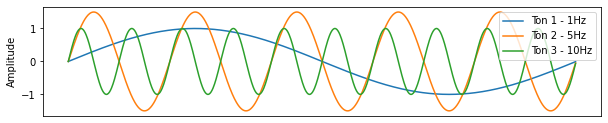

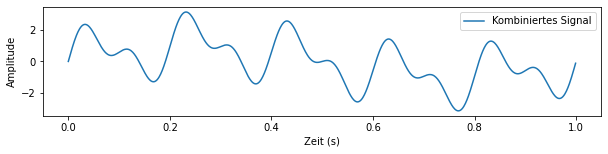

In [4]:
fig = plt.figure(figsize=(10,2))
plt.plot(t, y1, label='Ton 1 - 1Hz')
plt.plot(t, y2, label='Ton 2 - 5Hz')
plt.plot(t, y3, label='Ton 3 - 10Hz')
plt.ylabel('Amplitude')
plt.yticks([-1, 0, 1])
plt.xticks([])
plt.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,2))
plt.plot(t, combined, label='Kombiniertes Signal')
plt.ylabel('Amplitude')
plt.xlabel('Zeit (s)')
plt.legend()
plt.show()

Angenommen eine Freundin von euch hat aufgenommen wie ihr den Akkord gespielt habt, sie weiß allerdings nicht aus welchen Tönen er besteht. Wie kann sie trotzdem herausfinden aus welchen Frequenzen das Signal besteht?


Sie benötigt also eine Methode mit der die Amplitude von Frequenzen eines Signals ermittelt werden kann.


Diese Methode heißt die **Fourier-Transformation** (benannt nach Jean Baptiste Joseph Fourier)! In der folgenden Abbildung seht ihr das Ergebnis der Fourier-Transformation, die auf das Signal des Akkords angewendet wurde:

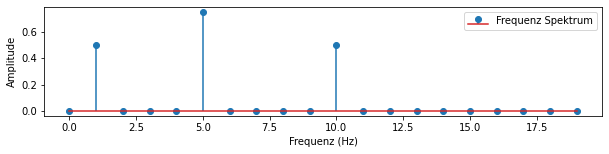

In [5]:
fig = plt.figure(figsize=(10,2))
plt.stem(frequncies[:20], abs(fourierTransform)[:20], label='Frequenz Spektrum')
plt.ylabel('Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.legend()
plt.show()

Es ist sichtbar, dass bei 1, 5 und 10Hz eine erhöhte Amplitude vorliegt. Die Frequenzen der einzelnen drei Töne konnte also herausgefunden werden. 

Auch EEG Signale bestehen aus verschieden Frequenzen. Gruppen aus Neuronen feuern in ihrer eigenen Frequenz um miteinander zu kommunizieren. Die **Fourier-Transformation** kann also auch für unsere EEG Daten eingesetzt werden um herauszufinden welche Frequenzen im unseren Signal vertreten sind. Ein Beispiel eines EEG-Frequenzspektrums sieht so aus:

<div>
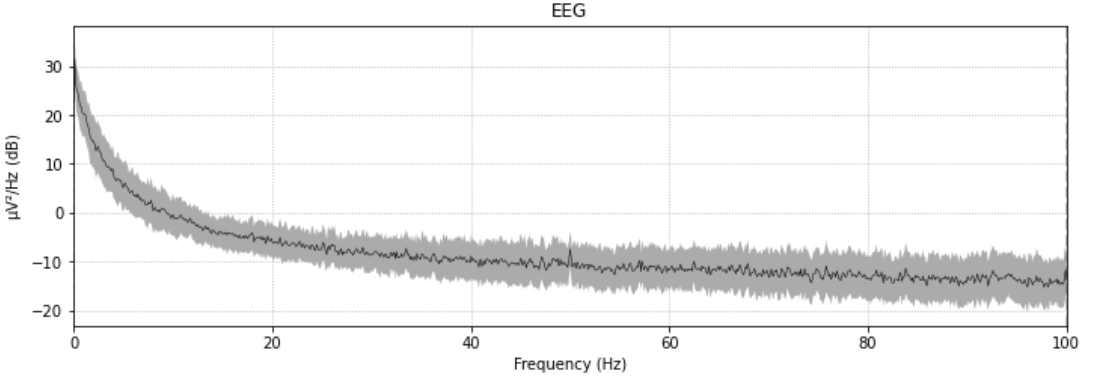
</div>

## 5) Frequenzbänder:

Wenn wir das Gehirn mit EEG untersuchen, teilen wir das Signal oft in verschiedene Wellenarten auf, die wir "Frequenz-Bänder" nennen. Das Frequenz Power Spektrum was ihr oben seht kann also in kleine Stücke geteilt und interpretiert werden. Jedes Frequenz-Band steh für ein oder mehrere Eigenschaften. Das sogenannte Alpha-Band zum Beispiel kann man oft beobachten, wenn die Person die Augen geschlossen hat und sich in einem träumerischen Zustand befindet. Das Alpha-Band wird zwischen 8 und 13 Hz definiert. Das Gamma-Band (32 - 100 Hz) wird beobachtet wenn die Person sich in einem konzentrierten Zustand befindet.  


In dieser Abbildung seht ihr wie die jeweiligen Bänder aussehen und wie ihr sie aufteilt. 

<br>
<br>

<div>
<img src="brainwaves.png" width="450"/>
</div>


C:\Users\gross\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


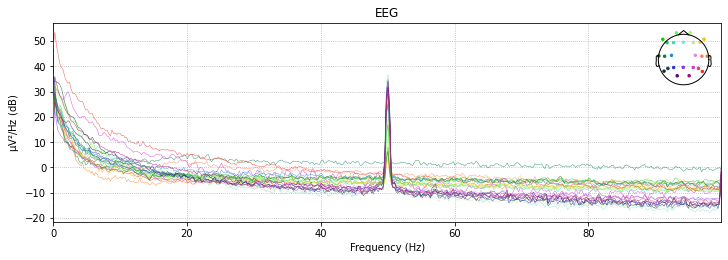

In [29]:
# Beispiel Power Spectrum in ungereinigten EEG Daten von allen Kanälen
raw.plot_psd(fmin=0, fmax=100)
plt.show()

Quellen:
- https://neurofeedback-in-hannover.de/tool/neurofeedback-biofeedback-2/